### Data Acquisition

In [1]:
# Import of all needed modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import of all needed data
assets = pd.read_csv('../data/raw/Assets_2020Q4.csv')
cf_liabs = pd.read_csv('../data/raw/Liabilities_2020Q4.csv')

### *** 1.- Asset Cash Flow projection ***

In [3]:
assets.head()

,PLAN,ISIN,VALOR,CUPON,FEC_VTO,VC_ACTUAL,NOM,TYPEB,SECTOR,RATING,...,TIPO_PRODUCTO,TIR_MDO,DUR,TirContable,Frecuencia,PRECIO,EMISOR,PAIS,TIPO_CUPON,SENIORITY
0,u101,ES0282102005,"UNIVERSIDAD DE VALENCIA 6,6% 15/12/2022",6.6,12/15/2022,"3,069,792.72","3,005,060.52",B,CAC,BB+,...,40,-0.29,1.895,5.41,1.0,113.83,Universidad de Valencia,ES,Fixed excl,SENIOR SECURED
1,u101,DE0001142552,BUNDESREPUB. DEUTSCHLAND 0% 04/01/2022,0.0,1/4/2022,"2,880,903.65","3,000,000.00",B,A99,AAA,...,42,-0.74,1.008,4.09,0.0,100.75,Federal Republic of Germany,DE,Zero bonds,SENIOR UNSECURED
2,u101,IT0001247342,BUONI POLIENNALI STRIP 0% 01/11/2024,0.0,11/1/2024,"319,205.01","400,000.00",B,A99,BBB-,...,42,-0.21,3.836,6.06,0.0,100.83,Italian Republic,IT,Zero bonds,SENIOR UNSECURED
3,u101,FR0000570996,FRANCE O.A.T. STRIP 0% 25/04/2021,0.0,4/25/2021,"5,035,102.13","5,100,000.00",B,A99,AA,...,42,-0.47,0.315,4.11,0.0,100.15,French Republic,FR,Zero bonds,SENIOR UNSECURED
4,u101,IT0004848435,ITALY BTPS HYBRID,0.0,11/1/2023,"477,212.70","565,000.00",B,A99,BBB-,...,42,-0.30,2.833,6.14,0.0,100.86,Italian Republic,IT,Zero bonds,SENIOR UNSECURED


In [4]:
assets_mod = assets[['PLAN','ISIN','VALOR','CUPON','FEC_VTO','NOM']]

In [5]:
assets_mod.head(15)

,PLAN,ISIN,VALOR,CUPON,FEC_VTO,NOM
0,u101,ES0282102005,"UNIVERSIDAD DE VALENCIA 6,6% 15/12/2022",6.60,12/15/2022,"3,005,060.52"
1,u101,DE0001142552,BUNDESREPUB. DEUTSCHLAND 0% 04/01/2022,0.00,1/4/2022,"3,000,000.00"
2,u101,IT0001247342,BUONI POLIENNALI STRIP 0% 01/11/2024,0.00,11/1/2024,"400,000.00"
3,u101,FR0000570996,FRANCE O.A.T. STRIP 0% 25/04/2021,0.00,4/25/2021,"5,100,000.00"
4,u101,IT0004848435,ITALY BTPS HYBRID,0.00,11/1/2023,"565,000.00"
5,u102,ES0213469580,"EUROPEAN INVESTMENT BANK 8,5% 17/06/2021",8.50,6/17/2021,"2,103,542.37"
6,u102,XS0105656267,BAYER HYPO- VEREINSBANK 5% 21/12/2029,5.00,12/21/2029,"15,200,000.00"
7,u102,XS0105174352,BAYER HYPO- VEREINSBANK 9% 13/12/2024,9.00,12/13/2024,"12,000,000.00"
8,u102,XS0095166897,"STATOILHYDRO ASA 7,15% 26/03/2029",7.15,3/26/2029,"20,000,000.00"
9,u102,XS0195051114,"NWBK 5,15% 06/24",5.15,6/29/2024,"60,000,000.00"


In [6]:
## Lets adapt the time column in order to anualize the annual CF
assets_mod['MATURITY'] = pd.DatetimeIndex(assets_mod['FEC_VTO']).year
assets_mod['YRS_TO_MAT'] = pd.DatetimeIndex(assets_mod['FEC_VTO']).year - 2020

/home/miguel/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/miguel/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
total_assets = assets_mod.shape[0]
total_assets

1298

In [8]:
assets_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1298 entries, 0 to 1297
Data columns (total 8 columns):
PLAN          1298 non-null object
ISIN          1268 non-null object
VALOR         1298 non-null object
CUPON         1298 non-null float64
FEC_VTO       1298 non-null object
NOM           1298 non-null object
MATURITY      1298 non-null int64
YRS_TO_MAT    1298 non-null int64
dtypes: float64(1), int64(2), object(5)
memory usage: 81.2+ KB


In [9]:
assets_mod["NOM"] = assets_mod["NOM"].str.replace(',','')

/home/miguel/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
#assets_mod.loc[:,"NOM"] = assets_mod["NOM"].str.replace(',','')

In [11]:
assets_mod["NOM"] = pd.to_numeric(assets_mod["NOM"], downcast='float', errors='ignore')

/home/miguel/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
assets_mod["YRS_TO_MAT"] = pd.to_numeric(assets_mod["YRS_TO_MAT"], downcast='integer', errors='ignore')

/home/miguel/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
cf_projection = pd.DataFrame(columns=['PLAN','ISIN','VALOR','COUPON','PRINCIPAL','YEAR'])
cf_projection

,PLAN,ISIN,VALOR,COUPON,PRINCIPAL,YEAR


In [14]:
### Lets perform the bonds projection:

for x in range(total_assets):

    maturity = int(assets_mod.iloc[x]["YRS_TO_MAT"])

    aux_df = pd.DataFrame({'PLAN':assets_mod.iloc[x]["PLAN"],
                      'ISIN':assets_mod.iloc[x]["ISIN"],
                      'VALOR':assets_mod.iloc[x]["VALOR"],
                      'COUPON':[assets_mod.iloc[x]["NOM"] * 0.01 * assets_mod.iloc[x]["CUPON"] for i in range(maturity)],
                      'PRINCIPAL': 0,
                      'YEAR': [2021+i for i in range(maturity)]})
    
    aux_df["PRINCIPAL"][maturity-1] = assets_mod.iloc[x]["NOM"]
    
    cf_projection = cf_projection.append(aux_df)

/home/miguel/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [15]:
cf_projection.head(30)

,PLAN,ISIN,VALOR,COUPON,PRINCIPAL,YEAR
0,u101,ES0282102005,"UNIVERSIDAD DE VALENCIA 6,6% 15/12/2022",1.983340e+05,0,2021
1,u101,ES0282102005,"UNIVERSIDAD DE VALENCIA 6,6% 15/12/2022",1.983340e+05,3005060,2022
0,u101,DE0001142552,BUNDESREPUB. DEUTSCHLAND 0% 04/01/2022,0.000000e+00,0,2021
1,u101,DE0001142552,BUNDESREPUB. DEUTSCHLAND 0% 04/01/2022,0.000000e+00,3000000,2022
0,u101,IT0001247342,BUONI POLIENNALI STRIP 0% 01/11/2024,0.000000e+00,0,2021
1,u101,IT0001247342,BUONI POLIENNALI STRIP 0% 01/11/2024,0.000000e+00,0,2022
2,u101,IT0001247342,BUONI POLIENNALI STRIP 0% 01/11/2024,0.000000e+00,0,2023
3,u101,IT0001247342,BUONI POLIENNALI STRIP 0% 01/11/2024,0.000000e+00,400000,2024
0,u101,FR0000570996,FRANCE O.A.T. STRIP 0% 25/04/2021,0.000000e+00,5100000,2021
0,u101,IT0004848435,ITALY BTPS HYBRID,0.000000e+00,0,2021


In [16]:
cf_projection["CF_ASSET"] = cf_projection["COUPON"] + cf_projection["PRINCIPAL"]

In [17]:
cf_assets= cf_projection.groupby(["PLAN","YEAR"], as_index=False).agg({"COUPON":"sum","PRINCIPAL":"sum","CF_ASSET":"sum"})
cf_assets.head()

,PLAN,YEAR,COUPON,PRINCIPAL,CF_ASSET
0,u101,2021,1.983340e+05,5100000,5.298334e+06
1,u101,2022,1.983340e+05,6005060,6.203394e+06
2,u101,2023,0.000000e+00,565000,5.650000e+05
3,u101,2024,0.000000e+00,400000,4.000000e+05
4,u102,2021,2.243757e+07,15908542,3.834611e+07


In [18]:
cf_assets["PLAN"].unique()

array(['u101', 'u102', 'u103', 'u104', 'u105', 'u106', 'u107', 'u108',
       'u109', 'u110', 'u114', 'u119', 'u120', 'u121', 'u125', 'u130',
       'u201', 'u202', 'u206', 'u207', 'u208', 'u210', 'u215', 'u218',
       'u220', 'u221', 'u222', 'u223', 'u225', 'u228', 'u229', 'u230',
       'u231', 'u232', 'u301', 'u302', 'u303', 'u304', 'u305', 'u308',
       'u310', 'u311', 'u401'], dtype=object)

In [19]:
cf125 =cf_assets[cf_assets["PLAN"] == "u125"]
cf125.head()

,PLAN,YEAR,COUPON,PRINCIPAL,CF_ASSET
313,u125,2021,19623989.3,58404000,78027989.3
314,u125,2022,17631174.4,90832000,108463174.4
315,u125,2023,14663740.5,95215000,109878740.5
316,u125,2024,12044078.5,97791000,109835078.5
317,u125,2025,9258446.5,73764000,83022446.5


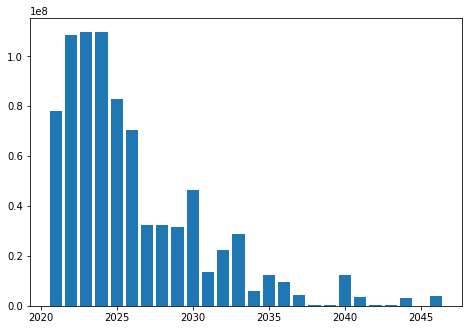

In [20]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(cf125["YEAR"],cf125["CF_ASSET"])
plt.show()

### *** 2.- Liaibilities Cash Flow preparation ***

In [21]:
cf_liabs.rename(columns={"group":"PLAN","t_to": "YEAR","l_cflow_rp": "CF_LIAB"}, inplace = True)

In [22]:
cf_liabs.head()

,PLAN,YEAR,CF_LIAB
0,u101,0,0.000000
1,u101,1,-2489.386711
2,u101,2,-1079.130255
3,u101,3,-418.506211
4,u101,4,-154.599644


In [23]:
cf_liabs['CF_LIAB'] =cf_liabs['CF_LIAB'] * - 1000

In [24]:
cf_liabs.head()

,PLAN,YEAR,CF_LIAB
0,u101,0,-0.000000e+00
1,u101,1,2.489387e+06
2,u101,2,1.079130e+06
3,u101,3,4.185062e+05
4,u101,4,1.545996e+05


In [25]:
# Modification in YEAR in order to equalize the info
cf_liabs["YEAR"] = cf_liabs["YEAR"] + 2020

In [26]:
cf_liabs = cf_liabs[cf_liabs["YEAR"]!=2020]

In [27]:
liab125 = cf_liabs[cf_liabs ["PLAN"] =="u125"]
liab125.head()

,PLAN,YEAR,CF_LIAB
733,u125,2021,1.279490e+08
734,u125,2022,1.044864e+08
735,u125,2023,8.495336e+07
736,u125,2024,6.972026e+07
737,u125,2025,5.709590e+07


### *** 3.- Asset and Liability combination ***

(2021.0, 2050.0)

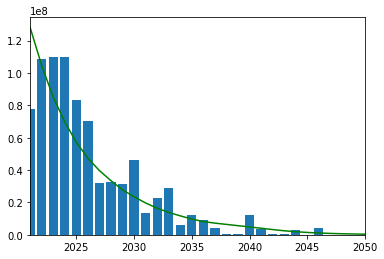

In [28]:
plt.bar(cf125["YEAR"],cf125["CF_ASSET"])
plt.plot(liab125["YEAR"],liab125["CF_LIAB"],'g')
plt.xlim(2021,2050)

In [29]:
cf_combined = cf_assets.merge(cf_liabs, left_on=["PLAN","YEAR"], right_on=["PLAN","YEAR"])

In [30]:
cf_combined.head(20)

,PLAN,YEAR,COUPON,PRINCIPAL,CF_ASSET,CF_LIAB
0,u101,2021,1.983340e+05,5100000,5.298334e+06,2.489387e+06
1,u101,2022,1.983340e+05,6005060,6.203394e+06,1.079130e+06
2,u101,2023,0.000000e+00,565000,5.650000e+05,4.185062e+05
3,u101,2024,0.000000e+00,400000,4.000000e+05,1.545996e+05
4,u102,2021,2.243757e+07,15908542,3.834611e+07,7.809456e+07
5,u102,2022,2.225332e+07,79405000,1.016583e+08,7.669518e+07
6,u102,2023,2.028425e+07,43822000,6.410625e+07,6.419243e+07
7,u102,2024,1.904425e+07,85760838,1.048051e+08,6.721859e+07
8,u102,2025,1.487425e+07,76998015,9.187226e+07,6.450928e+07
9,u102,2026,1.370225e+07,28822844,4.252509e+07,6.774409e+07


In [31]:
portfolios = cf_combined["PLAN"].unique().tolist()
auxiliaries = ['u106','u107','u201','u215','u218','u305']

In [32]:
for x in auxiliaries:
    portfolios.remove(x)

In [33]:
portfolios

['u101',
 'u102',
 'u103',
 'u104',
 'u105',
 'u108',
 'u109',
 'u110',
 'u120',
 'u121',
 'u125',
 'u130',
 'u202',
 'u206',
 'u207',
 'u210',
 'u220',
 'u221',
 'u229',
 'u230',
 'u231',
 'u301',
 'u302',
 'u303',
 'u304',
 'u310',
 'u311']

In [34]:
cf_complete = pd.DataFrame(columns=['PLAN','YEAR','CF_ASSET','CF_LIAB','CF_CUM_ASSET','CF_CUM_LIAB'])
cf_complete

,PLAN,YEAR,CF_ASSET,CF_LIAB,CF_CUM_ASSET,CF_CUM_LIAB


In [35]:
for portfolio in portfolios:
    aux_df = cf_combined[cf_combined["PLAN"] == portfolio]
    
    aux_df['CF_CUM_ASSET'] = aux_df['CF_ASSET'].cumsum()
    aux_df['CF_CUM_LIAB'] = aux_df['CF_LIAB'].cumsum()
    
    cf_complete = cf_complete.append(aux_df, sort=False)

/home/miguel/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/miguel/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [36]:
cf_complete['GAP'] = cf_complete['CF_ASSET'] - cf_complete['CF_LIAB']
cf_complete['CF_CUM'] = cf_complete['CF_CUM_ASSET'] - cf_complete['CF_CUM_LIAB']

In [37]:
u125 = cf_complete[cf_complete["PLAN"]=="u125"]

In [72]:
u125[["PLAN","YEAR","CF_ASSET","CF_LIAB","GAP"]]

,PLAN,YEAR,CF_ASSET,CF_LIAB,GAP
271,u125,2021,78027989.3,1.279490e+08,-4.992104e+07
272,u125,2022,108463174.4,1.044864e+08,3.976736e+06
273,u125,2023,109878740.5,8.495336e+07,2.492538e+07
274,u125,2024,109835078.5,6.972026e+07,4.011482e+07
275,u125,2025,83022446.5,5.709590e+07,2.592655e+07
276,u125,2026,70366913.3,4.733431e+07,2.303260e+07
277,u125,2027,32273922.8,3.963812e+07,-7.364198e+06
278,u125,2028,32509555.0,3.342486e+07,-9.153032e+05
279,u125,2029,31691185.0,2.775706e+07,3.934120e+06
280,u125,2030,46415105.0,2.350720e+07,2.290791e+07


(2021.0, 2050.0)

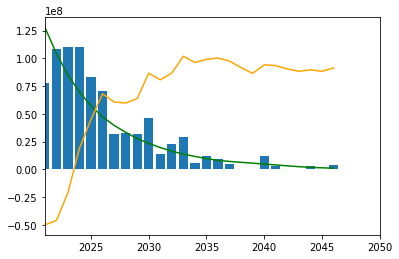

In [38]:
plt.bar(u125["YEAR"],u125["CF_ASSET"])
plt.plot(u125["YEAR"],u125["CF_LIAB"],'g')
plt.plot(u125["YEAR"],u125["CF_CUM"],color ='orange')
plt.xlim(2021,2050)

In [39]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [40]:
assets_sell = pd.DataFrame(columns=['PLAN','ISIN','VALOR','CUPON','FEC_VTO','NOM','MATURITY','YRS_TO_MAT'])
available_cash={}

In [41]:
for portfolio in portfolios:
    
    aux_df = pd.DataFrame(columns=['PLAN','ISIN','VALOR','CUPON','FEC_VTO','NOM','MATURITY','YRS_TO_MAT'])
    aux_df2 = pd.DataFrame(columns=['PLAN','ISIN','VALOR','CUPON','FEC_VTO','NOM','MATURITY','YRS_TO_MAT'])


    aux_df = cf_complete[cf_complete["PLAN"] == portfolio]

    elegible_years = aux_df.nlargest(3,['GAP'])["YEAR"].tolist()

    for year in elegible_years:
                sells_df = pd.DataFrame(columns=['PLAN','ISIN','VALOR','CUPON','FEC_VTO','NOM','MATURITY','YRS_TO_MAT'])

                goal = int(aux_df[aux_df["YEAR"] == year ]["GAP"])
                plan = assets_mod["PLAN"]== portfolio
                maturity = assets_mod["MATURITY"]== year
                alternatives = assets_mod[plan & maturity]["NOM"]
                target_asset = find_nearest(alternatives, goal)
                sells_df = assets_mod[plan & maturity][assets_mod[plan & maturity]["NOM"] == target_asset]
                aux_df2 = aux_df2.append(sells_df)
                available_cash[portfolio] = aux_df2["NOM"].sum()
                
    assets_sell = assets_sell.append(aux_df2)

In [42]:
available_cash

{'u101': 8505060.0,
 'u102': 225153900.0,
 'u103': 22356132.0,
 'u104': 50489784.0,
 'u105': 14897000.0,
 'u108': 6789791.0,
 'u109': 60300000.0,
 'u110': 88550000.0,
 'u120': 12700000.0,
 'u121': 16100000.0,
 'u125': 82800000.0,
 'u130': 35700000.0,
 'u202': 31054652.0,
 'u206': 58950000.0,
 'u207': 9300000.0,
 'u210': 509078180.0,
 'u220': 4042012.0,
 'u221': 2600000.0,
 'u229': 50001790.0,
 'u230': 7611292.0,
 'u231': 5596000.0,
 'u301': 11628766.0,
 'u302': 17666000.0,
 'u303': 14000000.0,
 'u304': 12865000.0,
 'u310': 3911000.0,
 'u311': 5916000.0}

In [43]:
assets_sell.head()

,PLAN,ISIN,VALOR,CUPON,FEC_VTO,NOM,MATURITY,YRS_TO_MAT
0,u101,ES0282102005,"UNIVERSIDAD DE VALENCIA 6,6% 15/12/2022",6.6,12/15/2022,3005060.5,2022,2
3,u101,FR0000570996,FRANCE O.A.T. STRIP 0% 25/04/2021,0.0,4/25/2021,5100000.0,2021,1
2,u101,IT0001247342,BUONI POLIENNALI STRIP 0% 01/11/2024,0.0,11/1/2024,400000.0,2024,4
43,u102,XS0083662923,EUROPEAN BK RECON & DEV 0% 04/02/2048,0.0,2/4/2048,105826152.0,2048,28
21,u102,ES00000121S7,"ESTADO4,7 07/41",4.7,7/30/2041,84700000.0,2041,21


In [44]:
assets_purchase = pd.DataFrame(columns=['PLAN','ISIN','VALOR','CUPON','FEC_VTO','NOM','MATURITY','YRS_TO_MAT'])
assets_purchase

,PLAN,ISIN,VALOR,CUPON,FEC_VTO,NOM,MATURITY,YRS_TO_MAT


In [45]:
for portfolio in portfolios:

    aux_df = pd.DataFrame(columns=['PLAN','ISIN','VALOR','CUPON','FEC_VTO','NOM','MATURITY','YRS_TO_MAT'])
    aux_df2 = pd.DataFrame(columns=['PLAN','ISIN','VALOR','CUPON','FEC_VTO','NOM','MATURITY','YRS_TO_MAT'])
    
    aux_df = cf_complete[cf_complete["PLAN"] == portfolio]
    
    gap_years = aux_df.nsmallest(5, ['GAP'])["YEAR"].tolist()
    cash = available_cash[portfolio]
    
    for year in gap_years:
        purchase_df = pd.DataFrame(columns=['PLAN','ISIN','VALOR','CUPON','FEC_VTO','NOM','MATURITY','YRS_TO_MAT'])
        
        if cash >= abs(aux_df.GAP[aux_df["YEAR"] == year].item()):

            purchase_df = pd.DataFrame({'PLAN':portfolio,
                            'ISIN': ["GEN_CORP_BOND_" + str(year)],
                            'VALOR': ["Generic corporate bond with maturity " + str(year)],
                            'CUPON':5,
                            'FEC_VTO':year,
                            'NOM':abs(int(aux_df.GAP[aux_df["YEAR"] == year].item())),
                            'MATURITY':year,
                            'YRS_TO_MAT': year - 2020})

            cash = cash - purchase_df.iloc[0]['NOM']

            aux_df2 = aux_df2.append(purchase_df)
            aux_df2 = aux_df2.reset_index(drop = True)
#        else:
#            assets_purchase.iloc[0]['NOM'] = assets_purchase.iloc[0]['NOM'] + available_cash

    assets_purchase = assets_purchase.append(aux_df2)

In [46]:
assets_purchase.head()

,PLAN,ISIN,VALOR,CUPON,FEC_VTO,NOM,MATURITY,YRS_TO_MAT
0,u101,GEN_CORP_BOND_2023,Generic corporate bond with maturity 2023,5,2023,146493,2023,3
1,u101,GEN_CORP_BOND_2024,Generic corporate bond with maturity 2024,5,2024,245400,2024,4
2,u101,GEN_CORP_BOND_2021,Generic corporate bond with maturity 2021,5,2021,2808947,2021,1
3,u101,GEN_CORP_BOND_2022,Generic corporate bond with maturity 2022,5,2022,5124263,2022,2
0,u102,GEN_CORP_BOND_2021,Generic corporate bond with maturity 2021,5,2021,39748451,2021,1


In [47]:
assets_purchase.replace({"GEN_CORP_BOND_2021": "CASH", "Generic corporate bond with maturity 2021": "Maintain Cash allocation"}, inplace=True)

In [48]:
assets_purchase[assets_purchase["PLAN"]=="u125"]

,PLAN,ISIN,VALOR,CUPON,FEC_VTO,NOM,MATURITY,YRS_TO_MAT
0,u125,CASH,Maintain Cash allocation,5,2021,49921042,2021,1
1,u125,GEN_CORP_BOND_2027,Generic corporate bond with maturity 2027,5,2027,7364198,2027,7
2,u125,GEN_CORP_BOND_2031,Generic corporate bond with maturity 2031,5,2031,5990307,2031,11
3,u125,GEN_CORP_BOND_2038,Generic corporate bond with maturity 2038,5,2038,5911758,2038,18
4,u125,GEN_CORP_BOND_2034,Generic corporate bond with maturity 2034,5,2034,5624162,2034,14


In [49]:
assets_sell.head()

,PLAN,ISIN,VALOR,CUPON,FEC_VTO,NOM,MATURITY,YRS_TO_MAT
0,u101,ES0282102005,"UNIVERSIDAD DE VALENCIA 6,6% 15/12/2022",6.6,12/15/2022,3005060.5,2022,2
3,u101,FR0000570996,FRANCE O.A.T. STRIP 0% 25/04/2021,0.0,4/25/2021,5100000.0,2021,1
2,u101,IT0001247342,BUONI POLIENNALI STRIP 0% 01/11/2024,0.0,11/1/2024,400000.0,2024,4
43,u102,XS0083662923,EUROPEAN BK RECON & DEV 0% 04/02/2048,0.0,2/4/2048,105826152.0,2048,28
21,u102,ES00000121S7,"ESTADO4,7 07/41",4.7,7/30/2041,84700000.0,2041,21


In [50]:
final_assets = pd.concat([assets_mod, assets_sell]).drop_duplicates(keep=False)

In [51]:
final_assets = final_assets.append(assets_purchase)

In [52]:
final_assets = final_assets.reset_index(drop=True)

In [53]:
final_assets[final_assets["PLAN"]=="u125"]

,PLAN,ISIN,VALOR,CUPON,FEC_VTO,NOM,MATURITY,YRS_TO_MAT
552,u125,IT0003535157,BTPS 5% 08/34,5.00,8/1/2034,4550000.0,2034,14
553,u125,ES0414970246,"CAIXAB3,625 01/21",3.63,1/18/2021,10500000.0,2021,1
554,u125,ES0414970204,"CAIXAB3,875 02/25",3.88,2/17/2025,500000.0,2025,5
555,u125,ES0312298021,"AYTCED 3,75% 12/22",3.75,12/14/2022,2000000.0,2022,2
556,u125,ES0000011868,ESTADO6%E/01-29,6.00,1/31/2029,3008000.0,2029,9
557,u125,ES0414950644,"CAJA MM4,125%",4.13,3/24/2036,4000000.0,2036,16
558,u125,ES0312342019,"AYTCED 3,75%",3.75,6/30/2025,200000.0,2025,5
559,u125,ES0000012411,"ESTADO 5,75% 07/32",5.75,7/30/2032,10927000.0,2032,12
560,u125,XS0304458051,"VODAF.5,375%",5.38,6/6/2022,383000.0,2022,2
561,u125,ES0413211071,BBVA 4% 25/02/25,4.00,2/25/2025,2000000.0,2025,5


In [54]:
final_cf_proj = pd.DataFrame(columns=['PLAN','ISIN','VALOR','COUPON','PRINCIPAL','YEAR'])
final_total_assets = final_assets.shape[0]

In [55]:
final_total_assets

1330

In [56]:
### Lets perform the bonds projection:

for x in range(final_total_assets):

    maturity = int(final_assets.iloc[x]["YRS_TO_MAT"])

    aux_df = pd.DataFrame({'PLAN':final_assets.iloc[x]["PLAN"],
                      'ISIN':final_assets.iloc[x]["ISIN"],
                      'VALOR':final_assets.iloc[x]["VALOR"],
                      'COUPON':[final_assets.iloc[x]["NOM"] * 0.01 * final_assets.iloc[x]["CUPON"] for i in range(maturity)],
                      'PRINCIPAL': 0,
                      'YEAR': [2021+i for i in range(maturity)]})
    
    aux_df["PRINCIPAL"][maturity-1] = final_assets.iloc[x]["NOM"]
    
    final_cf_proj = final_cf_proj.append(aux_df)

/home/miguel/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [57]:
final_cf_proj

,PLAN,ISIN,VALOR,COUPON,PRINCIPAL,YEAR
0,u101,DE0001142552,BUNDESREPUB. DEUTSCHLAND 0% 04/01/2022,0.000000e+00,0,2021
1,u101,DE0001142552,BUNDESREPUB. DEUTSCHLAND 0% 04/01/2022,0.000000e+00,3000000,2022
0,u101,IT0004848435,ITALY BTPS HYBRID,0.000000e+00,0,2021
1,u101,IT0004848435,ITALY BTPS HYBRID,0.000000e+00,0,2022
2,u101,IT0004848435,ITALY BTPS HYBRID,0.000000e+00,565000,2023
0,u102,ES0213469580,"EUROPEAN INVESTMENT BANK 8,5% 17/06/2021",1.788011e+05,2103542,2021
0,u102,XS0105656267,BAYER HYPO- VEREINSBANK 5% 21/12/2029,7.600000e+05,0,2021
1,u102,XS0105656267,BAYER HYPO- VEREINSBANK 5% 21/12/2029,7.600000e+05,0,2022
2,u102,XS0105656267,BAYER HYPO- VEREINSBANK 5% 21/12/2029,7.600000e+05,0,2023
3,u102,XS0105656267,BAYER HYPO- VEREINSBANK 5% 21/12/2029,7.600000e+05,0,2024


In [58]:
final_cf_proj["CF_ASSET"] = final_cf_proj["COUPON"] + final_cf_proj["PRINCIPAL"]

In [59]:
final_cf_proj

,PLAN,ISIN,VALOR,COUPON,PRINCIPAL,YEAR,CF_ASSET
0,u101,DE0001142552,BUNDESREPUB. DEUTSCHLAND 0% 04/01/2022,0.000000e+00,0,2021,0
1,u101,DE0001142552,BUNDESREPUB. DEUTSCHLAND 0% 04/01/2022,0.000000e+00,3000000,2022,3e+06
0,u101,IT0004848435,ITALY BTPS HYBRID,0.000000e+00,0,2021,0
1,u101,IT0004848435,ITALY BTPS HYBRID,0.000000e+00,0,2022,0
2,u101,IT0004848435,ITALY BTPS HYBRID,0.000000e+00,565000,2023,565000
0,u102,ES0213469580,"EUROPEAN INVESTMENT BANK 8,5% 17/06/2021",1.788011e+05,2103542,2021,2.28234e+06
0,u102,XS0105656267,BAYER HYPO- VEREINSBANK 5% 21/12/2029,7.600000e+05,0,2021,760000
1,u102,XS0105656267,BAYER HYPO- VEREINSBANK 5% 21/12/2029,7.600000e+05,0,2022,760000
2,u102,XS0105656267,BAYER HYPO- VEREINSBANK 5% 21/12/2029,7.600000e+05,0,2023,760000
3,u102,XS0105656267,BAYER HYPO- VEREINSBANK 5% 21/12/2029,7.600000e+05,0,2024,760000


In [60]:
final_cf_assets= final_cf_proj.groupby(["PLAN","YEAR"], as_index=False).agg({"COUPON":"sum","PRINCIPAL":"sum","CF_ASSET":"sum"})
final_cf_assets.tail()

,PLAN,YEAR,COUPON,PRINCIPAL,CF_ASSET
839,u401,2027,829300.0,7000000,7829300.0
840,u401,2028,718200.0,0,718200.0
841,u401,2029,718200.0,0,718200.0
842,u401,2030,718200.0,14000000,14718200.0
843,u401,2031,175000.0,5000000,5175000.0


In [61]:
final_cf_combined = final_cf_assets.merge(cf_liabs, left_on=["PLAN","YEAR"], right_on=["PLAN","YEAR"])

In [62]:
final_cf_complete = pd.DataFrame(columns=['PLAN','YEAR','CF_ASSET','CF_LIAB','CF_CUM_ASSET','CF_CUM_LIAB'])

In [63]:
for portfolio in portfolios:
    aux_df = final_cf_combined[final_cf_combined["PLAN"] == portfolio]
    
    aux_df['CF_CUM_ASSET'] = aux_df['CF_ASSET'].cumsum()
    aux_df['CF_CUM_LIAB'] = aux_df['CF_LIAB'].cumsum()
    
    final_cf_complete = final_cf_complete.append(aux_df, sort=False)

/home/miguel/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/miguel/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [64]:
final_cf_complete['GAP'] = final_cf_complete['CF_ASSET'] - final_cf_complete['CF_LIAB']
final_cf_complete['CF_CUM'] = final_cf_complete['CF_CUM_ASSET'] - final_cf_complete['CF_CUM_LIAB']

In [65]:
final_cf_combined[final_cf_combined['PLAN']=='u125']

,PLAN,YEAR,COUPON,PRINCIPAL,CF_ASSET,CF_LIAB
264,u125,2021,19957402.65,108325042,1.282824e+08,1.279490e+08
265,u125,2022,15468535.65,90832000,1.063005e+08,1.044864e+08
266,u125,2023,12501101.75,78315000,9.081610e+07,8.495336e+07
267,u125,2024,10555749.75,58791000,6.934675e+07,6.972026e+07
268,u125,2025,9252117.75,46864000,5.611612e+07,5.709590e+07
269,u125,2026,8338434.55,63273000,7.161143e+07,4.733431e+07
270,u125,2027,7212444.05,33670198,4.088264e+07,3.963812e+07
271,u125,2028,5885866.35,27500000,3.338587e+07,3.342486e+07
272,u125,2029,5059496.35,27508000,3.256750e+07,2.775706e+07
273,u125,2030,4491416.35,42800000,4.729142e+07,2.350720e+07


In [66]:
f_u125 = final_cf_complete[final_cf_complete["PLAN"]=="u125"]

(2021.0, 2050.0)

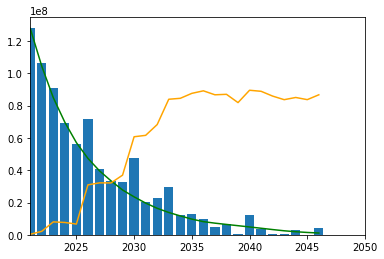

In [67]:
plt.bar(f_u125["YEAR"],f_u125["CF_ASSET"])
plt.plot(f_u125["YEAR"],f_u125["CF_LIAB"],'g')
plt.plot(f_u125["YEAR"],f_u125["CF_CUM"],color ='orange')
plt.xlim(2021,2050)

(2021.0, 2050.0)

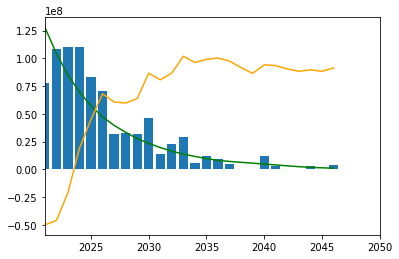

In [68]:
plt.bar(u125["YEAR"],u125["CF_ASSET"])
plt.plot(u125["YEAR"],u125["CF_LIAB"],'g')
plt.plot(u125["YEAR"],u125["CF_CUM"],color ='orange')
plt.xlim(2021,2050)

In [73]:
assets_sell.to_csv('../data/results/Assets_to_sell.csv')
assets_purchase.to_csv('../data/results/Assets_to_purchase.csv')
final_cf_complete.to_csv('../data/results/Final_cf_proj.csv')